In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
baseDir = r"C:\Users\MRINALI\Desktop\CatVsDog\data_split"
trainDir = os.path.join(baseDir, "train")
valDir = os.path.join(baseDir, "val")
testDir = os.path.join(baseDir, "test")


In [3]:
print("Train exists:", os.path.exists(trainDir))
print("Val exists:", os.path.exists(valDir))
print("Test exists:", os.path.exists(testDir))

Train exists: True
Val exists: True
Test exists: True


In [4]:
imageSize = (150, 150)
batchSize = 32

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
trainGenerator = datagen.flow_from_directory(
    trainDir,
    target_size=imageSize,
    batch_size=batchSize,
    class_mode='binary'
)


Found 17498 images belonging to 2 classes.


In [7]:
valGenerator = datagen.flow_from_directory(
    valDir,
    target_size=imageSize,
    batch_size=batchSize,
    class_mode='binary'
)

Found 3750 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(
    trainGenerator,
    validation_data=valGenerator,
    epochs=10
)

C:\Users\MRINALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
226/547 ━━━━━━━━━━━━━━━━━━━━ 3:19 620ms/step - accuracy: 0.5543 - loss: 0.7534

C:\Users\MRINALI\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


547/547 ━━━━━━━━━━━━━━━━━━━━ 357s 647ms/step - accuracy: 0.6490 - loss: 0.6237 - val_accuracy: 0.7096 - val_loss: 0.5647
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 342s 624ms/step - accuracy: 0.7605 - loss: 0.4886 - val_accuracy: 0.7829 - val_loss: 0.4606
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 339s 619ms/step - accuracy: 0.8186 - loss: 0.3985 - val_accuracy: 0.8032 - val_loss: 0.4336
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 337s 616ms/step - accuracy: 0.8702 - loss: 0.3004 - val_accuracy: 0.8251 - val_loss: 0.4148
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 335s 612ms/step - accuracy: 0.9220 - loss: 0.1921 - val_accuracy: 0.8109 - val_loss: 0.4951
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 395s 635ms/step - accuracy: 0.9646 - loss: 0.0983 - val_accuracy: 0.8101 - val_loss: 0.6611
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 345s 630ms/step - accuracy: 0.9842 - loss: 0.0494 - val_accuracy: 0.8152 - val_loss: 0.7791
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 340s 622ms/step - accuracy: 0.9866 - loss: 0.04

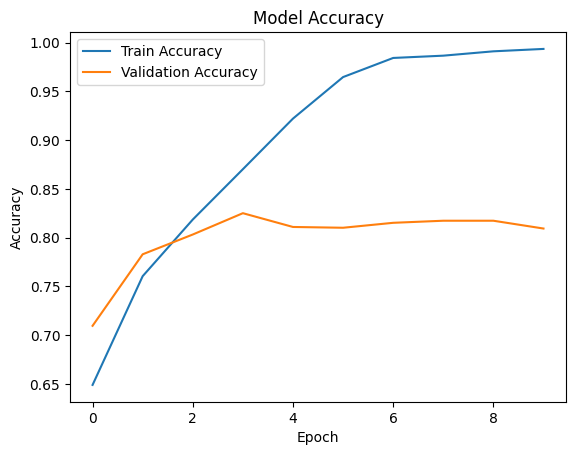

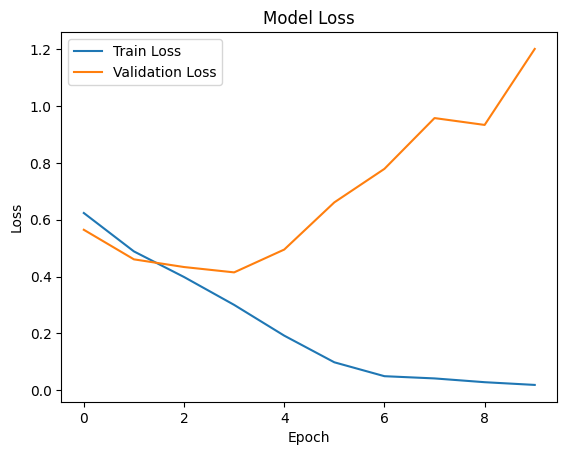

In [15]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.save("cat_dog_classifier.keras")

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess image
img_path = "C:\\Users\\MRINALI\\Downloads\\idk.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)
class_label = "Dog" if prediction[0][0] > 0.5 else "Cat"
print(f"Predicted class: {class_label} ({prediction[0][0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Dog (1.0000)


In [20]:
pip install modal

     ---------------------------------------- 0.0/643.4 kB ? eta -:--:--
     --- ----------------------------------- 51.2/643.4 kB 1.3 MB/s eta 0:00:01
     ------- ------------------------------ 122.9/643.4 kB 1.4 MB/s eta 0:00:01
     --------- ---------------------------- 163.8/643.4 kB 1.2 MB/s eta 0:00:01
     ------------- ------------------------ 235.5/643.4 kB 1.3 MB/s eta 0:00:01
     ----------------- -------------------- 297.0/643.4 kB 1.3 MB/s eta 0:00:01
     --------------------- ---------------- 368.6/643.4 kB 1.3 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/643.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------- --------- 481.3/643.4 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 532.5/643.4 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- -- 593.9/643.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  634.9/643.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  634


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\MRINALI\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [21]:
modal token new

SyntaxError: invalid syntax (3191179069.py, line 1)